In [2]:
from urllib2 import Request, urlopen, HTTPError
from urlparse import urlunparse, urlparse
import json 
import pandas as pd
import requests
import requests_cache
from bs4 import BeautifulSoup

In [21]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [3]:
requests_cache.install_cache("project141")

In [4]:
url="https://api.nytimes.com/svc/mostpopular/v2/mostviewed/all-sections/7/?api-key=e273ed2eb9f24e549143f627cc6ba4b1"

In [5]:
response=requests.get(url)

In [6]:
urllist=[response.json()[u'results'][i][u'url'] for i in range(len(response.json()[u'results']))]

In [19]:
urllist

[u'http://www.nytimes.com/2017/02/24/us/politics/white-house-sean-spicer-briefing.html',
 u'http://www.nytimes.com/2017/02/19/world/europe/last-night-in-sweden-trumps-remark-baffles-a-nation.html',
 u'http://www.nytimes.com/2017/02/22/us/politics/devos-sessions-transgender-students-rights.html',
 u'http://www.nytimes.com/2017/02/21/us/politics/dhs-immigration-trump.html',
 u'http://www.nytimes.com/2017/02/22/science/trappist-1-exoplanets-nasa.html',
 u'http://www.nytimes.com/2017/02/19/us/politics/donald-trump-ukraine-russia.html',
 u'http://www.nytimes.com/2017/02/22/technology/trump-news-media-ignore.html',
 u'http://www.nytimes.com/2017/02/20/us/politics/cpac-milo-yiannopoulos.html',
 u'http://www.nytimes.com/2017/02/22/arts/television/bill-maher-milo-yiannopoulos-interview.html',
 u'http://www.nytimes.com/2017/02/20/world/europe/trump-pursues-his-attack-on-sweden-with-scant-evidence.html',
 u'http://www.nytimes.com/2017/02/23/upshot/dismal-results-from-vouchers-surprise-researchers

In [23]:
def getcontent(url):
    """
    Extract the title, text, and author of an Aggie article
    Input: url-> url for the article. 
    Output: a dictionary that contains the author, text, url and title.       
    """
    artic= requests.get(url,"lxml")
    soup_arti=BeautifulSoup(artic.text)
    content=soup_arti.select("article[id='story'] > div[class='story-body-supplemental'] > div > p ")
    if content==[]:
        content=soup_arti.select("p[class='paragraph--story']")
    text=" ".join([i.text.strip() for i in content])
    return text

In [24]:
allcontent=[getcontent(i) for i in urllist]

In [56]:
from functools import reduce
a=reduce((lambda x, y: x + y),allcontent)

In [31]:
dfcontent= pd.DataFrame(allcontent)

In [34]:
df=dfcontent.rename(index=str,columns={0:"content"})

In [35]:
df

,content
0,WASHINGTON — President Trump turned the power ...
1,"LONDON — Swedes reacted with confusion, anger ..."
2,WASHINGTON — President Trump on Wednesday resc...
3,WASHINGTON — President Trump has directed his ...
4,"Not just one, but seven Earth-size planets tha..."
5,A week before Michael T. Flynn resigned as nat...
6,I spent last week ignoring President Trump. Al...
7,"WASHINGTON — Milo Yiannopoulos, a polemical Br..."
8,If you were disappointed that Bill Maher broug...
9,"PALM BEACH, Fla. — On Friday night, Fox News a..."


In [36]:
textonly= df["content"]

In [50]:
a=textonly.iloc[1]

In [37]:
stemmer = PorterStemmer().stem
tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    """
    stemmatize words
    Input: words
    Output: stemmer
    """
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [39]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
tfs = vectorizer.fit_transform(textonly)

In [40]:
freq=1/vectorizer.idf_
freq

array([ 0.41066336,  0.37619044,  0.37619044, ...,  0.29838497,
        0.47650536,  0.95347958])

In [42]:
vocab=vectorizer.vocabulary_
pop_vocab = {k:freq[v] for k, v in vocab.iteritems() if k.isalpha()}

In [45]:
pop_vocab

{u'elisabeth': 0.29838496833875167,
 u'poorli': 0.29838496833875167,
 u'protest': 0.50888490240445516,
 u'sleep': 0.3394536660667255,
 u'asian': 0.29838496833875167,
 u'mansion': 0.29838496833875167,
 u'captain': 0.29838496833875167,
 u'hate': 0.37619044385300399,
 u'accus': 0.3394536660667255,
 u'voter': 0.44389934226764438,
 u'sorri': 0.37619044385300399,
 u'lorr': 0.29838496833875167,
 u'sunlik': 0.29838496833875167,
 u'flanneri': 0.29838496833875167,
 u'hedg': 0.29838496833875167,
 u'pride': 0.29838496833875167,
 u'sway': 0.29838496833875167,
 u'winfrey': 0.29838496833875167,
 u'digit': 0.29838496833875167,
 u'everi': 0.47650535804050431,
 u'risk': 0.3394536660667255,
 u'vastli': 0.3394536660667255,
 u'rise': 0.41066336285849692,
 u'voic': 0.3394536660667255,
 u'distort': 0.3394536660667255,
 u'malmo': 0.29838496833875167,
 u'loom': 0.29838496833875167,
 u'govern': 0.5740734608082918,
 u'jacob': 0.29838496833875167,
 u'appar': 0.3394536660667255,
 u'prot\xe9g\xe9': 0.29838496833875

In [58]:
import operator
sortedvoc = sorted(pop_vocab.items(), key=operator.itemgetter(1),reverse= True)
vocdf=pd.DataFrame(sortedvoc)
dfreduce=vocdf.loc[:100,:] #only looked at top 50 words for simplicity
dff=dfreduce.rename(index=str,columns={0:"voc",1:"invf"})


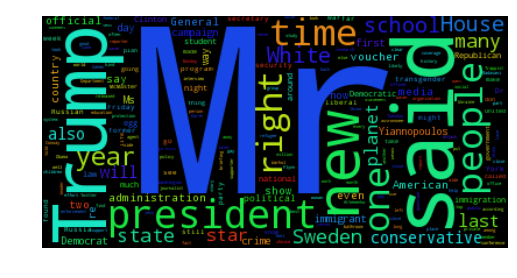

In [57]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(a)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()